In [2]:
!pip install pandas-profiling


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
#загрузка библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #графики
import seaborn as sns


In [3]:
import pandas as pd
xls = pd.ExcelFile('test.xlsx')
df = pd.read_excel(xls, 'Sheet1')

display(df.head(5))

,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж
0,8063,1265,1884,Starter,2023-05-31 21:07:58.254952+03,3900.0,26,1,BILL,NaN
1,8062,3177,3465,Trial,2023-05-31 20:46:18.41827+03,0.0,100,1,CARD,NaN
2,8061,2486,3115,Business,2023-05-31 20:25:03.160129+03,3840.0,12,1,CARD,NaN
3,8060,454,1976,Business,2023-05-31 18:42:38.041497+03,5440.0,17,1,BILL,NaN
4,8059,2222,3464,Trial,2023-05-31 16:14:29.046525+03,0.0,100,1,CARD,NaN


In [4]:
df.describe()

,id,Владелец,Клуб,Сумма оплаты,Кол-во хостов,Месяцев,Родительский платеж
count,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,59.000000
mean,4569.110547,1090.104929,2161.780174,2758.076676,126.758246,1.316419,6255.169492
std,2028.569904,1303.064882,507.514561,5929.375216,240.898812,4.496016,727.448663
min,1001.000000,11.000000,1556.000000,0.000000,1.000000,1.000000,5012.000000
25%,2868.250000,170.000000,1745.000000,0.000000,24.000000,1.000000,5764.000000
50%,4473.500000,556.000000,1975.000000,0.000000,100.000000,1.000000,6261.000000
75%,6407.750000,1644.000000,2496.750000,4160.000000,100.000000,1.000000,6663.500000
max,8063.000000,7001.000000,3465.000000,146880.000000,1034.000000,254.000000,7750.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518 entries, 0 to 5517
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5518 non-null   int64  
 1   Владелец             5518 non-null   int64  
 2   Клуб                 5518 non-null   int64  
 3   Тип подписки         5518 non-null   object 
 4   Дата оплаты          5518 non-null   object 
 5   Сумма оплаты         5518 non-null   float64
 6   Кол-во хостов        5518 non-null   int64  
 7   Месяцев              5518 non-null   int64  
 8   Метод оплаты         5518 non-null   object 
 9   Родительский платеж  59 non-null     float64
dtypes: float64(2), int64(5), object(3)
memory usage: 431.2+ KB


In [6]:
# превод в формат даты (избавление от часов)
import pandas as pd
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты']).dt.date

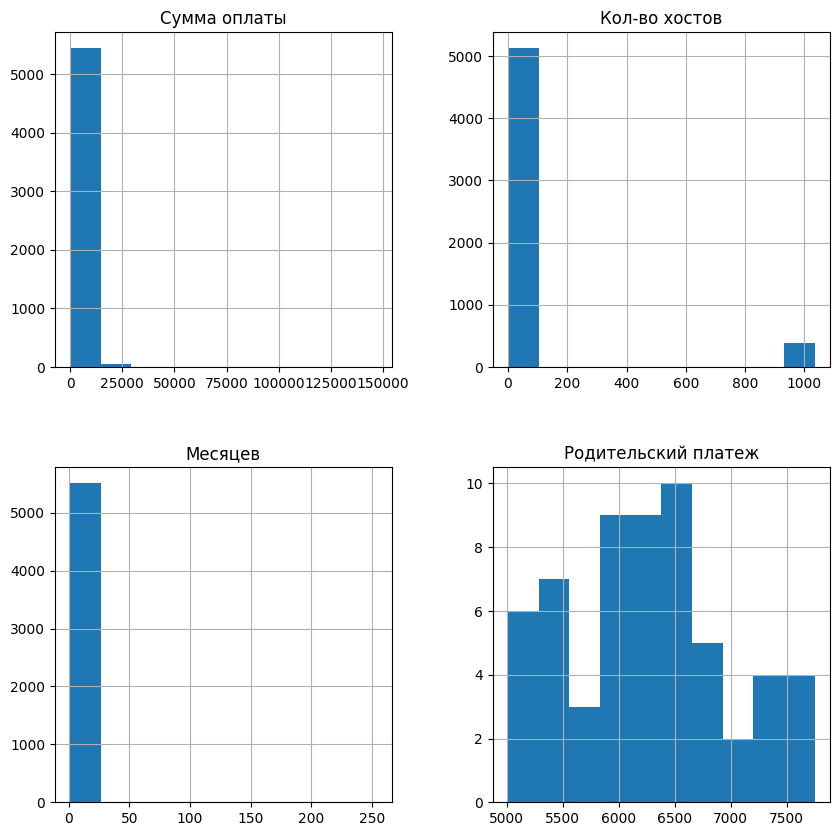

In [7]:
# графическое представление данных из таблиц
df[['Сумма оплаты', 'Кол-во хостов','Месяцев', 'Родительский платеж']].hist(figsize=(10, 10))
plt.show()

In [8]:
#просмотр количества пропусков в столбцах
print(df.isna().sum())
#проверка на явные дубликаты
print('dublicated:', df.duplicated().sum())

id                        0
Владелец                  0
Клуб                      0
Тип подписки              0
Дата оплаты               0
Сумма оплаты              0
Кол-во хостов             0
Месяцев                   0
Метод оплаты              0
Родительский платеж    5459
dtype: int64
dublicated: 0


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/var/folders/td/pkh_8fmj3yjfn1g8h1073hkw0000gn/T/ipykernel_66355/111884

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# избавление от строк с родительс платежом
df = df[df['Родительский платеж'].isna()]
display(df.head())

,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж
0,8063,1265,1884,Starter,2023-05-31,3900.0,26,1,BILL,NaN
1,8062,3177,3465,Trial,2023-05-31,0.0,100,1,CARD,NaN
2,8061,2486,3115,Business,2023-05-31,3840.0,12,1,CARD,NaN
3,8060,454,1976,Business,2023-05-31,5440.0,17,1,BILL,NaN
4,8059,2222,3464,Trial,2023-05-31,0.0,100,1,CARD,NaN


In [12]:
# Функция для добавления срока действия к дате заключения договора
def calculate_end_date(row): 
    return row['Дата оплаты'] + pd.DateOffset(months=row['Месяцев'])

# Применение функции к каждой строке DataFrame
df['дата_завершения'] = df.apply(calculate_end_date, axis=1)

display(df.head(20))

,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж,дата_завершения
0,8063,1265,1884,Starter,2023-05-31,3900.0,26,1,BILL,NaN,2023-06-30
1,8062,3177,3465,Trial,2023-05-31,0.0,100,1,CARD,NaN,2023-06-30
2,8061,2486,3115,Business,2023-05-31,3840.0,12,1,CARD,NaN,2023-06-30
3,8060,454,1976,Business,2023-05-31,5440.0,17,1,BILL,NaN,2023-06-30
4,8059,2222,3464,Trial,2023-05-31,0.0,100,1,CARD,NaN,2023-06-30
6,8057,454,1975,Starter,2023-05-31,1950.0,13,1,BILL,NaN,2023-06-30
7,8056,3173,3463,Trial,2023-05-31,0.0,100,1,CARD,NaN,2023-06-30
8,8055,3172,3462,Trial,2023-05-31,0.0,100,1,CARD,NaN,2023-06-30
9,8054,1231,2434,Business,2023-05-31,8000.0,25,1,CARD,NaN,2023-06-30
10,8053,380,2714,Starter,2023-05-31,4050.0,27,1,BILL,NaN,2023-06-30


In [14]:
# Сортировка данных по клубу и дате заключения договора
df_sorted = df.sort_values(by=['Клуб', 'Дата оплаты'])

# Группировка данных по клубу
grouped = df_sorted.groupby('Клуб')

# Новый - если все 
df_sorted['Новый'] = ''
df_sorted['Последний'] = ''
for club, group in grouped:
    new_contracts = group[group['Дата оплаты'] == group['Дата оплаты'].min()]
    last_contracts = group[group['Дата оплаты'] == group['Дата оплаты'].max()]
    df_sorted.loc[new_contracts.index, 'Новый'] = 'Новый клуб'
    df_sorted.loc[last_contracts.index, 'Последний'] = 'Последний договор клуба'
    


display(df_sorted.head(50))

,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж,дата_завершения,Новый,Последний
5397,1166,3062,1556,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,
5036,1708,3062,1556,Free,2022-06-20,0.0,100,1,CARD,NaN,2022-07-20,,
4868,1940,3062,1556,Business,2022-06-27,0.0,999,1,CARD,NaN,2022-07-27,,
4424,2528,3062,1556,Business,2022-07-25,0.0,999,1,CARD,NaN,2022-08-25,,
4425,2527,3062,1556,Business,2022-07-25,0.0,999,1,CARD,NaN,2022-08-25,,
4426,2526,3062,1556,Business,2022-07-25,0.0,999,1,CARD,NaN,2022-08-25,,
3473,3670,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3474,3669,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3475,3668,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3476,3667,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба


### 1.Список ушедших клубов

In [19]:
df_sorted['Дата оплаты'] = pd.to_datetime(df_sorted['Дата оплаты']).dt.date
df_sorted['дата_завершения'] = pd.to_datetime(df_sorted['дата_завершения']).dt.date

In [20]:
# дата завершения указала до 31 дек 23года ( можно менять на более оптимальный вариант)
from datetime import datetime,date

end_date = date(2023, 12, 31)
gone = df_sorted[(df_sorted['Последний'] == 'Последний договор клуба') & (df_sorted['дата_завершения'] < end_date)]
display(gone.head(10))


,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж,дата_завершения,Новый,Последний
3473,3670,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3474,3669,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3475,3668,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3476,3667,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3477,3666,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3478,3665,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3479,3664,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3480,3663,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3481,3662,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба
3482,3661,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба


### 2. Распределение по типам подписок ушедшие клубы

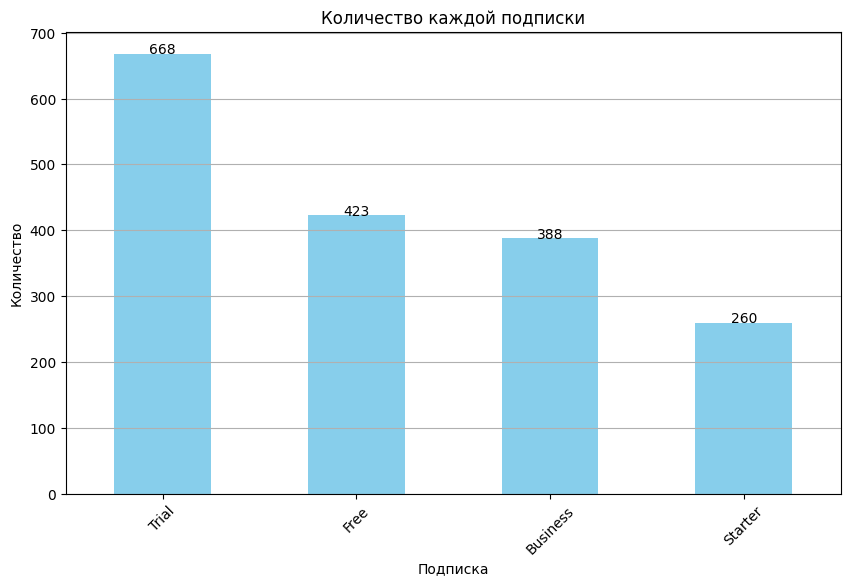

In [21]:
import matplotlib.pyplot as plt

# Подсчет количества каждой подписки
subscription_counts = gone['Тип подписки'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
subscription_counts.plot(kind='bar', color='skyblue')
plt.title('Количество каждой подписки')
plt.xlabel('Подписка')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Добавление текстовых меток над каждым столбцом
for i, count in enumerate(subscription_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

### 3. Пропуски между платежами

In [22]:
# Сортировка данных по клубу и дате заключения договора
df_sorted1 = df_sorted.sort_values(by=['Клуб', 'Тип подписки', 'Дата оплаты'])

# Группировка данных по клубу
grouped = df_sorted1.groupby(['Клуб', 'Тип подписки'])



# Вычисление разницы в днях между датой окончания предыдущего договора и датой заключения следующего договора
df_sorted1['gap'] = grouped['Дата оплаты'].shift(0) - grouped['дата_завершения'].shift(1)

display(df_sorted1.head(10))

,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж,дата_завершения,Новый,Последний,gap
5397,1166,3062,1556,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,,NaT
4868,1940,3062,1556,Business,2022-06-27,0.0,999,1,CARD,NaN,2022-07-27,,,-6 days
4424,2528,3062,1556,Business,2022-07-25,0.0,999,1,CARD,NaN,2022-08-25,,,-2 days
4425,2527,3062,1556,Business,2022-07-25,0.0,999,1,CARD,NaN,2022-08-25,,,-31 days
4426,2526,3062,1556,Business,2022-07-25,0.0,999,1,CARD,NaN,2022-08-25,,,-31 days
3473,3670,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба,49 days
3474,3669,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба,-31 days
3475,3668,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба,-31 days
3476,3667,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба,-31 days
3477,3666,3062,1556,Business,2022-10-13,0.0,999,1,CARD,NaN,2022-11-13,,Последний договор клуба,-31 days


In [98]:
# Сохранение DataFrame в Excel
#df_sorted1.to_excel('fomina_game.xlsx', index=False)

In [23]:
print('средняя продолжительность пропуска: ', df_sorted1['gap'].mean().days)
print('Среднее без учета строк со значением -31: ',df_sorted1[df_sorted1['gap'] != '-31 days']['gap'].mean().days)
print('Среднее без отриц значений: ',df_sorted1[df_sorted1['gap'] > pd.Timedelta(0)]['gap'].mean().days)


средняя продолжительность пропуска:  2
Среднее без учета строк со значением -31:  3
Среднее без отриц значений:  18


**Краткие выводы:** Средняя продолжительность пропусков 18 дней. Если попдписка полностью завершена - возобновление в среднем составляет 18 дней

### 4. Какое количество хостов обычно оплачивают новые клубы

In [24]:
# новые клубы
new = df_sorted1[(df_sorted1['Новый'] == 'Новый клуб')]
display(new.head())

,id,Владелец,Клуб,Тип подписки,Дата оплаты,Сумма оплаты,Кол-во хостов,Месяцев,Метод оплаты,Родительский платеж,дата_завершения,Новый,Последний,gap
5397,1166,3062,1556,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,,NaT
5407,1154,11,1564,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,Последний договор клуба,NaT
5484,1043,18,1587,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,,NaT
5483,1044,18,1588,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,,NaT
5485,1042,20,1590,Business,2022-06-03,0.0,999,1,CARD,NaN,2022-07-03,Новый клуб,,NaT


In [25]:
pivot_new = new.pivot_table(index = 'Клуб',
                           columns = 'Тип подписки',
                           values = 'Кол-во хостов',
                           aggfunc = 'sum')
pivot_new.reset_index(inplace = True)
display(pivot_new)

Тип подписки,Клуб,Business,Free,Starter,Trial
0,1556,999.0,NaN,NaN,NaN
1,1564,999.0,NaN,NaN,NaN
2,1587,999.0,NaN,NaN,NaN
3,1588,999.0,NaN,NaN,NaN
4,1590,999.0,NaN,NaN,NaN
...,...,...,...,...,...
1647,3461,1.0,NaN,NaN,100.0
1648,3462,NaN,NaN,NaN,100.0
1649,3463,NaN,NaN,NaN,100.0
1650,3464,NaN,NaN,NaN,100.0


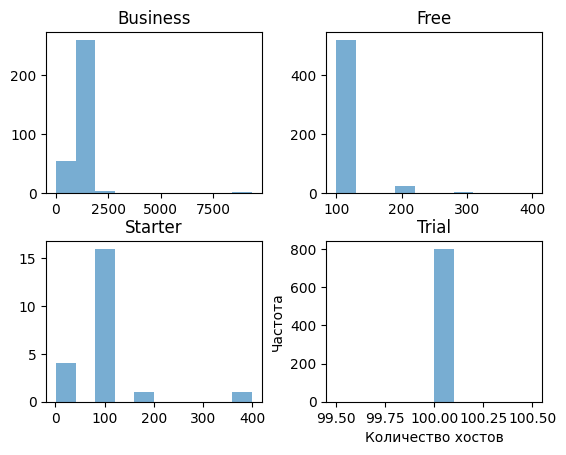

In [26]:
pivot_new[['Business','Free','Starter','Trial']].hist(alpha=0.6, grid=False)
plt.xlabel('Количество хостов')
plt.ylabel('Частота')
plt.show()

In [27]:
# Перебор для подсчета наиболее часто встречаемых значений хостов у новых клиентов
for column in pivot_new.columns[1:]:
    # Подсчет частоты значений
    value_counts = pivot_new[column].value_counts()
    
    # Вычисление процентного соотношения
    percentages = value_counts / len(pivot_new) * 100
    
    # Объединение результатов в один DataFrame
    column_result = pd.concat([value_counts, percentages], axis=1)
    column_result.columns = ['Частота', '%']
    column_result.index.name = 'Значение'
    
    # Вывод результатов
    print('Наиболее частое количество оплачиваемых хостов в подписке:', column)
    print(column_result.head(5))
    print('\n')


Наиболее частое количество оплачиваемых хостов в подписке: Business
          Частота          %
Значение                    
999.0         260  15.738499
1.0             7   0.423729
25.0            7   0.423729
20.0            6   0.363196
30.0            3   0.181598


Наиболее частое количество оплачиваемых хостов в подписке: Free
          Частота          %
Значение                    
100.0         519  31.416465
200.0          24   1.452785
300.0           3   0.181598
400.0           1   0.060533


Наиболее частое количество оплачиваемых хостов в подписке: Starter
          Частота         %
Значение                   
100.0          16  0.968523
1.0             1  0.060533
200.0           1  0.060533
400.0           1  0.060533
24.0            1  0.060533


Наиболее частое количество оплачиваемых хостов в подписке: Trial
          Частота          %
Значение                    
100.0         803  48.607748




In [28]:
# новые клубы, у которых была оплата больше 0
new1 = df_sorted1[(df_sorted1['Новый'] == 'Новый клуб') & (df_sorted1['Сумма оплаты'] > 0)]

pivot_new1 = new1.pivot_table(index = 'Клуб',
                           columns = 'Тип подписки',
                           values = 'Кол-во хостов',
                           aggfunc = 'sum')
pivot_new1.reset_index(inplace = True)

for column in pivot_new1.columns[1:]:
    # Подсчет частоты значений
    value_counts1 = pivot_new1[column].value_counts()
    
    # Вычисление процентного соотношения
    percentages1 = value_counts1 / len(pivot_new1) * 100
    
    # Объединение результатов в один DataFrame
    column_result1 = pd.concat([value_counts1, percentages1], axis=1)
    column_result1.columns = ['Частота', '%']
    column_result1.index.name = 'Значение'
    
    # Вывод результатов
    print('Наиболее частое количество оплачиваемых хостов в подписке:', column)
    print(column_result1.head(5))
    print('\n')



Наиболее частое количество оплачиваемых хостов в подписке: Business
          Частота          %
Значение                    
1.0             7  12.280702
25.0            7  12.280702
20.0            6  10.526316
17.0            3   5.263158
30.0            3   5.263158


Наиболее частое количество оплачиваемых хостов в подписке: Starter
          Частота         %
Значение                   
1.0             1  1.754386
24.0            1  1.754386
11.0            1  1.754386
14.0            1  1.754386




**Краткие выводы:**  Новые клубы на старте чаще всего берут 999 хостов по подписке Business ( 15.7% от всех клубов) , 100 хостов при подписке Free ( 31%), 100 - Starter (1%),  100 хостов - trial (48%).
 Если рассматривать только платные подписки: то в Business чаще всего оплачивают либо 1 хост либо 20, 25. В подписке Starter платно приобрели 1 хост, 24 , 11 и 14 на старте.

### 6. Есть ли зависимость между количеством хостов и выбором типа подписки 

![Корреляция](cor.png)
![Корреляция](cor1.png)

**Краткие выводы:** Зависимости нет между количеством хостов и выбором типа подпики. Корреляция составляет 0,197, что говорит о очень слабой зависимости этих двух показателей

### 7. Какой средний LTV (life time value)

Простая формула LTV: средний чек × среднее время работы. 
Рациональнее всего было бы посчитать среднюю стоимость подписок по клубу и умножить на количество подписок по этому же клубу. Так как очень много подписок без оплаты, расчитаем среднюю сумму оплаты по каждому клубу

In [29]:
print('Количество подписок, стоимость и среднее значение по всем клубам')
value = df_sorted1.groupby('Клуб')['Сумма оплаты'].agg(['count', 'sum', 'mean'])\
       .sort_values(by = 'mean', ascending = False)
display(value)
print('среднее значение ltv ', round(value['mean'].mean(),2))

Количество подписок, стоимость и среднее значение по всем клубам


,count,sum,mean
Клуб,,,
3088,2,146880.0,73440.0
2858,2,97920.0,48960.0
2946,2,97920.0,48960.0
2720,2,68544.0,34272.0
3248,2,66576.0,33288.0
...,...,...,...
2491,1,0.0,0.0
2489,1,0.0,0.0
2488,1,0.0,0.0


среднее значение ltv  1318.3
